## Raw data overview (simple EDA)

This notebook gives a quick, **simple** overview of the CSVs exported in `data/`:
- basic shape + missing values
- a few small plots (distributions / top categories)

If you don’t have the plotting deps yet:

```bash
python3 -m pip install pandas matplotlib
```

In [11]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

if "seaborn-v0_8-whitegrid" in plt.style.available:
    plt.style.use("seaborn-v0_8-whitegrid")

# Be resilient to running the notebook from repo root or from ./code
ROOT = Path.cwd()
DATA_DIR = ROOT / "data"
if not DATA_DIR.exists():
    DATA_DIR = ROOT.parent / "data"

DATA_DIR

PosixPath('/Users/mihaicoretchi/repos/AIA/data')

In [12]:
def load_csv(filename: str) -> pd.DataFrame:
    path = DATA_DIR / filename
    if not path.exists():
        raise FileNotFoundError(path)
    # Some exports may be empty (e.g., events on limited API plans).
    if path.stat().st_size <= 5:
        return pd.DataFrame()
    return pd.read_csv(path)


FILES = [
    "matches.csv",
    "standings.csv",
    "teams.csv",
    "scorers.csv",
    "match_goals.csv",
    "match_bookings.csv",
]

dfs = {f: load_csv(f) for f in FILES}
{f: df.shape for f, df in dfs.items()}

{'matches.csv': (1140, 46),
 'standings.csv': (60, 29),
 'teams.csv': (60, 27),
 'scorers.csv': (150, 25),
 'match_goals.csv': (0, 0),
 'match_bookings.csv': (0, 0)}

In [13]:
def quick_overview(df: pd.DataFrame, *, name: str) -> None:
    print(f"\n=== {name} ===")
    if df.empty:
        print("(empty)")
        return
    print("shape:", df.shape)
    display(df.head(5))

    # Types
    display(df.dtypes.to_frame("dtype"))

    # Missing values (top 20)
    missing_frac = df.isna().mean().sort_values(ascending=False)
    missing_frac = missing_frac[missing_frac > 0].head(20)
    if not missing_frac.empty:
        display(missing_frac.to_frame("missing_frac"))


for name, df in dfs.items():
    quick_overview(df, name=name)


=== matches.csv ===
shape: (1140, 46)


,area_name,attendance,awayTeam_crest,awayTeam_id,awayTeam_name,awayTeam_shortName,awayTeam_tla,bookings_count,competition_code,competition_id,competition_name,goals_count,group,homeTeam_crest,homeTeam_id,homeTeam_name,homeTeam_shortName,homeTeam_tla,injuryTime,lastUpdated,match_id,matchday,minute,odds_awayWin,odds_draw,odds_homeWin,raw_json,referees_json,score_duration,score_extraTime_away,score_extraTime_home,score_fullTime_away,score_fullTime_home,score_halfTime_away,score_halfTime_home,score_penalties_away,score_penalties_home,score_regularTime_away,score_regularTime_home,score_winner,season_endDate,season_startDate,stage,status,utcDate,venue
0,Spain,NaN,https://crests.football-data.org/87.png,87,Rayo Vallecano de Madrid,Rayo Vallecano,RAY,0,PD,2014,Primera Division,0,NaN,https://crests.football-data.org/267.png,267,UD Almería,Almería,ALM,NaN,2023-10-09T15:20:25Z,438482,1,NaN,NaN,NaN,NaN,"{""area"":{""id"":2224,""name"":""Spain"",""code"":""ESP""...","[{""id"": 80747, ""name"": ""Javier Alberola Rojas""...",REGULAR,NaN,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,AWAY_TEAM,2024-05-26,2023-08-13,REGULAR_SEASON,FINISHED,2023-08-11T17:30:00Z,NaN
1,Spain,NaN,https://crests.football-data.org/95.png,95,Valencia CF,Valencia,VAL,0,PD,2014,Primera Division,0,NaN,https://crests.football-data.org/559.png,559,Sevilla FC,Sevilla FC,SEV,NaN,2023-10-09T15:20:25Z,438479,1,NaN,NaN,NaN,NaN,"{""area"":{""id"":2224,""name"":""Spain"",""code"":""ESP""...","[{""id"": 207080, ""name"": ""José Sánchez Martínez...",REGULAR,NaN,NaN,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,AWAY_TEAM,2024-05-26,2023-08-13,REGULAR_SEASON,FINISHED,2023-08-11T20:00:00Z,NaN
2,Spain,NaN,https://crests.football-data.org/298.png,298,Girona FC,Girona,GIR,0,PD,2014,Primera Division,0,NaN,https://crests.football-data.org/92.png,92,Real Sociedad de Fútbol,Real Sociedad,RSO,NaN,2023-10-09T15:20:25Z,438481,1,NaN,NaN,NaN,NaN,"{""area"":{""id"":2224,""name"":""Spain"",""code"":""ESP""...","[{""id"": 214213, ""name"": ""Francisco Hernández M...",REGULAR,NaN,NaN,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,DRAW,2024-05-26,2023-08-13,REGULAR_SEASON,FINISHED,2023-08-12T15:00:00Z,NaN
3,Spain,NaN,https://crests.football-data.org/89.png,89,RCD Mallorca,Mallorca,MAL,0,PD,2014,Primera Division,0,NaN,https://crests.football-data.org/275.png,275,UD Las Palmas,Las Palmas,LPA,NaN,2023-10-09T15:20:25Z,438483,1,NaN,NaN,NaN,NaN,"{""area"":{""id"":2224,""name"":""Spain"",""code"":""ESP""...","[{""id"": 56995, ""name"": ""Víctor García Verdura""...",REGULAR,NaN,NaN,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,DRAW,2024-05-26,2023-08-13,REGULAR_SEASON,FINISHED,2023-08-12T17:30:00Z,NaN
4,Spain,NaN,https://crests.football-data.org/86.png,86,Real Madrid CF,Real Madrid,RMA,0,PD,2014,Primera Division,0,NaN,https://crests.football-data.org/77.png,77,Athletic Club,Athletic,ATH,NaN,2024-06-09T20:20:41Z,438474,1,NaN,NaN,NaN,NaN,"{""area"":{""id"":2224,""name"":""Spain"",""code"":""ESP""...","[{""id"": 206211, ""name"": ""Jesús Gil Manzano"", ""...",REGULAR,NaN,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,AWAY_TEAM,2024-05-26,2023-08-13,REGULAR_SEASON,FINISHED,2023-08-12T19:30:00Z,NaN


,dtype
area_name,object
attendance,float64
awayTeam_crest,object
awayTeam_id,int64
awayTeam_name,object
awayTeam_shortName,object
awayTeam_tla,object
bookings_count,int64
competition_code,object
competition_id,int64


,missing_frac
attendance,1.000000
group,1.000000
minute,1.000000
odds_awayWin,1.000000
odds_draw,1.000000
injuryTime,1.000000
venue,1.000000
odds_homeWin,1.000000
score_extraTime_away,0.997368
score_extraTime_home,0.997368



=== standings.csv ===
shape: (60, 29)


,area_id,area_name,competition_code,competition_id,competition_name,draw,form,goalDifference,goalsAgainst,goalsFor,lost,matchday,playedGames,points,position,raw_row_json,raw_team_json,season_currentMatchday,season_endDate,season_id,season_startDate,standing_stage,standing_type,team_crest,team_id,team_name,team_shortName,team_tla,won
0,NaN,NaN,PD,2014,Primera Division,8,"D,D,W,W,W",61,26,87,1,38,38,95,1,"{""position"":1,""team"":{""id"":86,""name"":""Real Mad...","{""id"":86,""name"":""Real Madrid CF"",""shortName"":""...",38,2024-05-26,1577,2023-08-13,REGULAR_SEASON,TOTAL,https://crests.football-data.org/86.png,86,Real Madrid CF,Real Madrid,RMA,29
1,NaN,NaN,PD,2014,Primera Division,7,"W,W,W,W,L",35,44,79,5,38,38,85,2,"{""position"":2,""team"":{""id"":81,""name"":""FC Barce...","{""id"":81,""name"":""FC Barcelona"",""shortName"":""Ba...",38,2024-05-26,1577,2023-08-13,REGULAR_SEASON,TOTAL,https://crests.football-data.org/81.png,81,FC Barcelona,Barça,FCB,26
2,NaN,NaN,PD,2014,Primera Division,6,"W,W,L,D,W",39,46,85,7,38,38,81,3,"{""position"":3,""team"":{""id"":298,""name"":""Girona ...","{""id"":298,""name"":""Girona FC"",""shortName"":""Giro...",38,2024-05-26,1577,2023-08-13,REGULAR_SEASON,TOTAL,https://crests.football-data.org/298.png,298,Girona FC,Girona,GIR,25
3,NaN,NaN,PD,2014,Primera Division,4,"W,L,W,W,W",27,43,70,10,38,38,76,4,"{""position"":4,""team"":{""id"":78,""name"":""Club Atl...","{""id"":78,""name"":""Club Atlético de Madrid"",""sho...",38,2024-05-26,1577,2023-08-13,REGULAR_SEASON,TOTAL,https://crests.football-data.org/78.png,78,Club Atlético de Madrid,Atleti,ATL,24
4,NaN,NaN,PD,2014,Primera Division,11,"W,W,L,D,W",24,37,61,8,38,38,68,5,"{""position"":5,""team"":{""id"":77,""name"":""Athletic...","{""id"":77,""name"":""Athletic Club"",""shortName"":""A...",38,2024-05-26,1577,2023-08-13,REGULAR_SEASON,TOTAL,https://crests.football-data.org/77.png,77,Athletic Club,Athletic,ATH,19


,dtype
area_id,float64
area_name,float64
competition_code,object
competition_id,int64
competition_name,object
draw,int64
form,object
goalDifference,int64
goalsAgainst,int64
goalsFor,int64


,missing_frac
area_id,1.0
area_name,1.0



=== teams.csv ===
shape: (60, 27)


,area_code,area_id,area_name,coach_contract_start,coach_contract_until,coach_id,coach_name,coach_nationality,competition_code,competition_id,competition_name,marketValue,raw_json,runningCompetitions_json,season_endDate,season_id,season_startDate,team_address,team_clubColors,team_crest,team_founded,team_id,team_name,team_shortName,team_tla,team_venue,team_website
0,ESP,2224,Spain,2022-07,2026-06,15873,Ernesto Valverde,Spain,PD,2014,Primera Division,NaN,"{""area"":{""id"":2224,""name"":""Spain"",""code"":""ESP""...","[{""id"": 2014, ""name"": ""Primera Division"", ""cod...",2024-05-26,1577,2023-08-13,"Ibaigane, Alameda Mazarredo, 23 Bilbao 48009",Red / White / Black,https://crests.football-data.org/77.png,1898,77,Athletic Club,Athletic,ATH,San Mamés,http://www.athletic-club.eus
1,ESP,2224,Spain,2011-12,2027-06,132,Diego Simeone,Argentina,PD,2014,Primera Division,NaN,"{""area"":{""id"":2224,""name"":""Spain"",""code"":""ESP""...","[{""id"": 2014, ""name"": ""Primera Division"", ""cod...",2024-05-26,1577,2023-08-13,"Paseo Virgen del Puerto, 67 Madrid 28005",Red / White / Blue,https://crests.football-data.org/78.png,1903,78,Club Atlético de Madrid,Atleti,ATL,Estadio Wanda Metropolitano,http://www.clubatleticodemadrid.com
2,ESP,2224,Spain,2025-06,2027-06,176612,Alessio Lisci,Italy,PD,2014,Primera Division,NaN,"{""area"":{""id"":2224,""name"":""Spain"",""code"":""ESP""...","[{""id"": 2014, ""name"": ""Primera Division"", ""cod...",2024-05-26,1577,2023-08-13,"Calle del Sadar, s/n Pamplona 31006",Red / Navy Blue,https://crests.football-data.org/79.png,1920,79,CA Osasuna,Osasuna,OSA,Estadio El Sadar,http://www.osasuna.es
3,ESP,2224,Spain,2024-07,2027-06,133997,Hansi Flick,Germany,PD,2014,Primera Division,NaN,"{""area"":{""id"":2224,""name"":""Spain"",""code"":""ESP""...","[{""id"": 2014, ""name"": ""Primera Division"", ""cod...",2024-05-26,1577,2023-08-13,Avenida Arístides Maillol s/n Barcelona 08028,Red / Navy Blue / Orange,https://crests.football-data.org/81.png,1899,81,FC Barcelona,Barça,FCB,Camp Nou,http://www.fcbarcelona.com
4,ESP,2224,Spain,2023-04,2026-06,3155,Pepe Bordalás,Spain,PD,2014,Primera Division,NaN,"{""area"":{""id"":2224,""name"":""Spain"",""code"":""ESP""...","[{""id"": 2014, ""name"": ""Primera Division"", ""cod...",2024-05-26,1577,2023-08-13,"Avenida Teresa de Calcuta, s/n Getafe 28903",Blue / White,https://crests.football-data.org/82.png,1946,82,Getafe CF,Getafe,GET,Coliseum Alfonso Pérez,http://www.getafecf.com


,dtype
area_code,object
area_id,int64
area_name,object
coach_contract_start,object
coach_contract_until,object
coach_id,int64
coach_name,object
coach_nationality,object
competition_code,object
competition_id,int64


,missing_frac
marketValue,1.0



=== scorers.csv ===
shape: (150, 25)


,assists,competition_code,competition_id,competition_name,goals,penalties,player_dateOfBirth,player_firstName,player_id,player_lastName,player_name,player_nationality,player_position,player_shirtNumber,raw_player_json,raw_scorer_json,raw_team_json,season_endDate,season_id,season_startDate,team_crest,team_id,team_name,team_shortName,team_tla
0,8.0,PD,2014,Primera Division,24,7.0,1997-06-21,Artem,24217,Dovbyk,Artem Dovbyk,Ukraine,NaN,7.0,"{""id"":24217,""name"":""Artem Dovbyk"",""firstName"":...","{""player"":{""id"":24217,""name"":""Artem Dovbyk"",""f...","{""id"":298,""name"":""Girona FC"",""shortName"":""Giro...",2024-05-26,1577,2023-08-13,https://crests.football-data.org/298.png,298,Girona FC,Girona,GIR
1,6.0,PD,2014,Primera Division,23,NaN,1995-12-05,Alexander,8167,Sørloth,Alexander Sørloth,Norway,NaN,NaN,"{""id"":8167,""name"":""Alexander Sørloth"",""firstNa...","{""player"":{""id"":8167,""name"":""Alexander Sørloth...","{""id"":94,""name"":""Villarreal CF"",""shortName"":""V...",2024-05-26,1577,2023-08-13,https://crests.football-data.org/94.png,94,Villarreal CF,Villarreal,VIL
2,6.0,PD,2014,Primera Division,19,1.0,2003-06-29,Jude,125010,Bellingham,Jude Bellingham,England,NaN,NaN,"{""id"":125010,""name"":""Jude Bellingham"",""firstNa...","{""player"":{""id"":125010,""name"":""Jude Bellingham...","{""id"":86,""name"":""Real Madrid CF"",""shortName"":""...",2024-05-26,1577,2023-08-13,https://crests.football-data.org/86.png,86,Real Madrid CF,Real Madrid,RMA
3,8.0,PD,2014,Primera Division,19,4.0,1988-08-21,Robert,371,Lewandowski,Robert Lewandowski,Poland,NaN,NaN,"{""id"":371,""name"":""Robert Lewandowski"",""firstNa...","{""player"":{""id"":371,""name"":""Robert Lewandowski...","{""id"":81,""name"":""FC Barcelona"",""shortName"":""Ba...",2024-05-26,1577,2023-08-13,https://crests.football-data.org/81.png,81,FC Barcelona,Barça,FCB
4,2.0,PD,2014,Primera Division,17,3.0,1991-07-22,Ante,2237,Budimir,Ante Budimir,Croatia,NaN,NaN,"{""id"":2237,""name"":""Ante Budimir"",""firstName"":""...","{""player"":{""id"":2237,""name"":""Ante Budimir"",""fi...","{""id"":79,""name"":""CA Osasuna"",""shortName"":""Osas...",2024-05-26,1577,2023-08-13,https://crests.football-data.org/79.png,79,CA Osasuna,Osasuna,OSA


,dtype
assists,float64
competition_code,object
competition_id,int64
competition_name,object
goals,int64
penalties,float64
player_dateOfBirth,object
player_firstName,object
player_id,int64
player_lastName,object


,missing_frac
player_position,1.000000
player_shirtNumber,0.933333
player_firstName,0.653333
penalties,0.540000
assists,0.160000
player_dateOfBirth,0.006667



=== match_goals.csv ===
(empty)

=== match_bookings.csv ===
(empty)


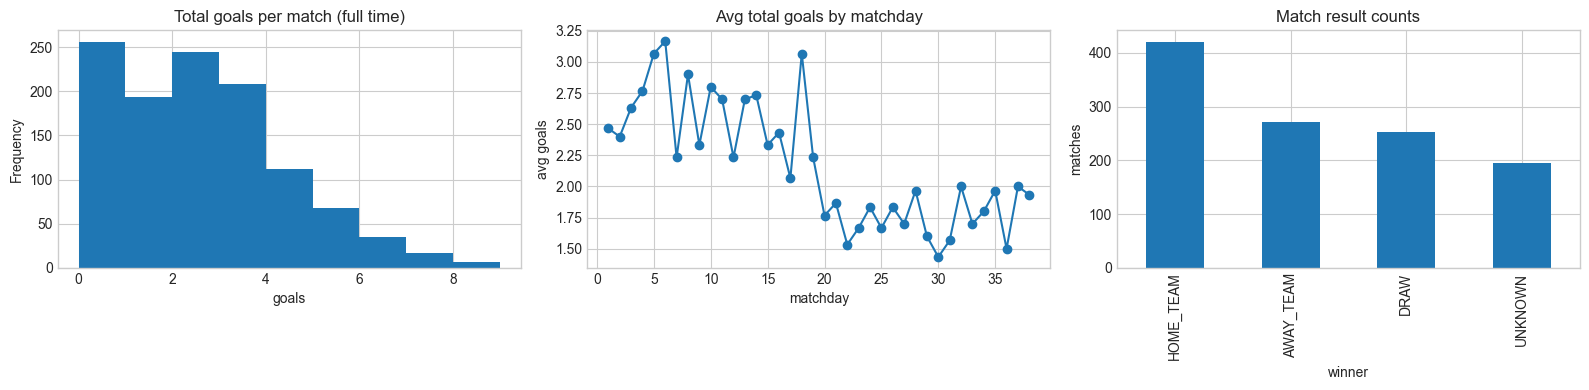

In [14]:
# Matches: goal distribution + goals by matchday + results breakdown
matches = dfs["matches.csv"].copy()
if not matches.empty:
    for c in ["utcDate", "season_startDate", "season_endDate", "lastUpdated"]:
        if c in matches.columns:
            matches[c] = pd.to_datetime(matches[c], errors="coerce", utc=True)

    for c in ["score_fullTime_home", "score_fullTime_away", "matchday"]:
        if c in matches.columns:
            matches[c] = pd.to_numeric(matches[c], errors="coerce")

    matches["total_goals"] = matches["score_fullTime_home"].fillna(0) + matches["score_fullTime_away"].fillna(0)

    max_goals = pd.to_numeric(matches["total_goals"], errors="coerce").max()
    max_goals = int(max_goals) if pd.notna(max_goals) else 10

    fig, ax = plt.subplots(1, 3, figsize=(16, 4))

    matches["total_goals"].plot(kind="hist", bins=range(0, max_goals + 2), ax=ax[0])
    ax[0].set_title("Total goals per match (full time)")
    ax[0].set_xlabel("goals")

    if "matchday" in matches.columns:
        (
            matches.groupby("matchday")["total_goals"].mean().sort_index()
            .plot(kind="line", marker="o", ax=ax[1])
        )
        ax[1].set_title("Avg total goals by matchday")
        ax[1].set_xlabel("matchday")
        ax[1].set_ylabel("avg goals")

    if "score_winner" in matches.columns:
        matches["score_winner"].fillna("UNKNOWN").value_counts().plot(kind="bar", ax=ax[2])
        ax[2].set_title("Match result counts")
        ax[2].set_xlabel("winner")
        ax[2].set_ylabel("matches")

    plt.tight_layout()
    plt.show()

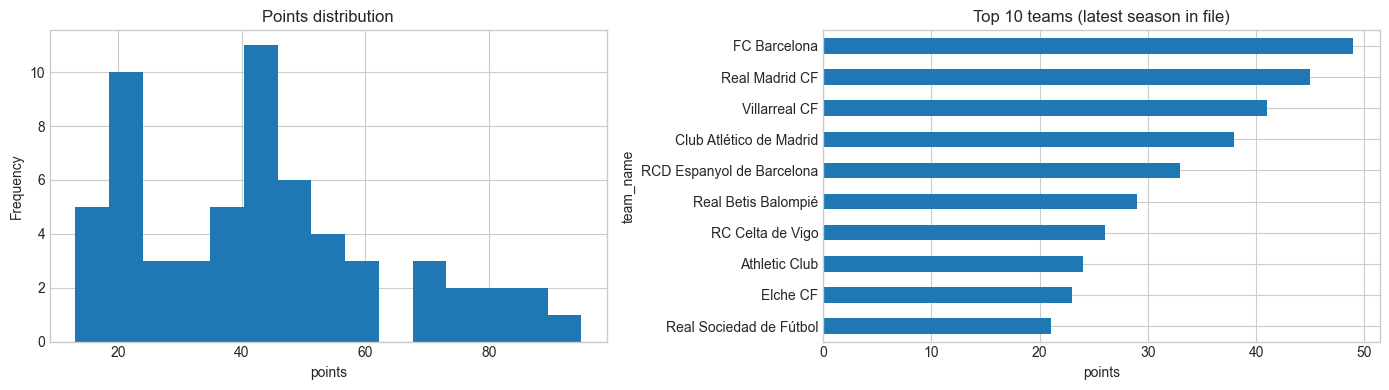

In [15]:
# Standings: points distribution + top teams in latest season
standings = dfs["standings.csv"].copy()
if not standings.empty:
    standings["points"] = pd.to_numeric(standings.get("points"), errors="coerce")
    standings["goalsFor"] = pd.to_numeric(standings.get("goalsFor"), errors="coerce")
    standings["goalsAgainst"] = pd.to_numeric(standings.get("goalsAgainst"), errors="coerce")

    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    standings["points"].dropna().plot(kind="hist", bins=15, ax=ax[0])
    ax[0].set_title("Points distribution")
    ax[0].set_xlabel("points")

    if "season_startDate" in standings.columns:
        season_dt = pd.to_datetime(standings["season_startDate"], errors="coerce")
        latest_season = season_dt.max()
        latest = standings[season_dt == latest_season].copy() if pd.notna(latest_season) else standings.copy()
    else:
        latest = standings.copy()

    top = latest.sort_values(["points", "goalsFor"], ascending=False).head(10)
    if not top.empty and "team_name" in top.columns:
        top.set_index("team_name")["points"].plot(kind="barh", ax=ax[1])
        ax[1].invert_yaxis()
        ax[1].set_title("Top 10 teams (latest season in file)")
        ax[1].set_xlabel("points")

    plt.tight_layout()
    plt.show()

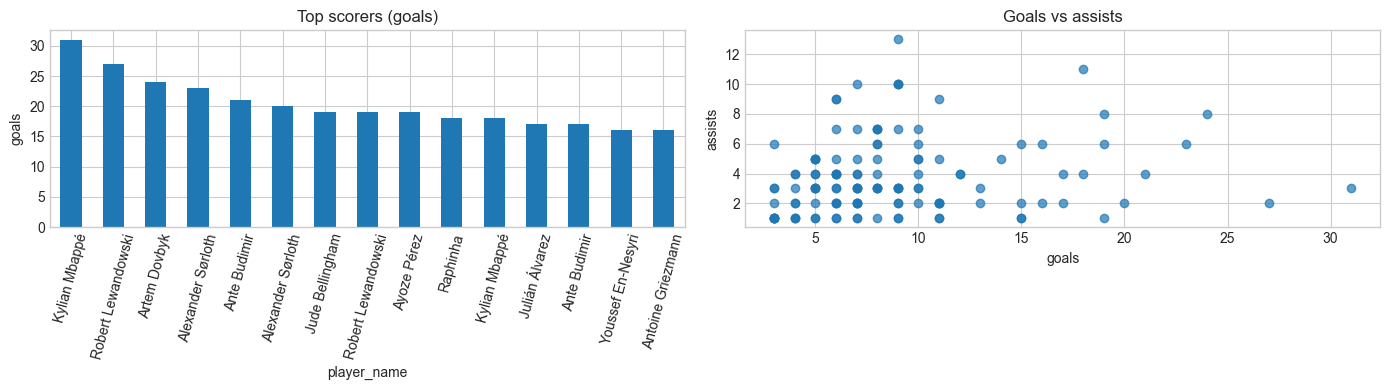

In [16]:
# Scorers: top scorers + goals vs assists
scorers = dfs["scorers.csv"].copy()
if not scorers.empty:
    scorers["goals"] = pd.to_numeric(scorers.get("goals"), errors="coerce")
    scorers["assists"] = pd.to_numeric(scorers.get("assists"), errors="coerce")

    top = scorers.sort_values("goals", ascending=False).head(15)
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))

    if "player_name" in top.columns:
        top.set_index("player_name")["goals"].plot(kind="bar", ax=ax[0])
        ax[0].set_title("Top scorers (goals)")
        ax[0].set_ylabel("goals")
        ax[0].tick_params(axis="x", rotation=75)

    ax[1].scatter(scorers["goals"], scorers["assists"], alpha=0.7)
    ax[1].set_title("Goals vs assists")
    ax[1].set_xlabel("goals")
    ax[1].set_ylabel("assists")

    plt.tight_layout()
    plt.show()

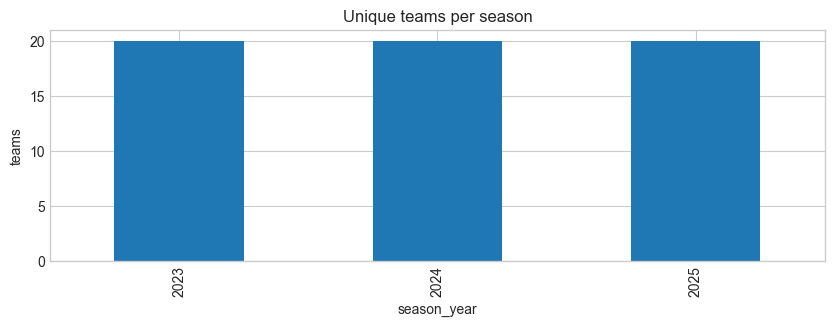

In [17]:
# Teams: how many teams per season (based on season_startDate)
teams = dfs["teams.csv"].copy()
if not teams.empty and "season_startDate" in teams.columns:
    season_dt = pd.to_datetime(teams["season_startDate"], errors="coerce")
    teams["season_year"] = season_dt.dt.year

    if "team_id" in teams.columns:
        counts = teams.groupby("season_year")["team_id"].nunique().sort_index()
    else:
        counts = teams.groupby("season_year").size().sort_index()

    counts.plot(kind="bar", figsize=(10, 3), title="Unique teams per season")
    plt.ylabel("teams")
    plt.show()
elif teams.empty:
    print("teams.csv is empty")
else:
    print("teams.csv does not have season_startDate")

In [18]:
# Events (optional): these may be empty depending on API access
for f in ["match_goals.csv", "match_bookings.csv"]:
    df = dfs.get(f)
    if df is None or df.empty:
        print(f"{f}: empty")
    else:
        print(f"{f}: shape={df.shape}")
        display(df.head(5))

match_goals.csv: empty
match_bookings.csv: empty
